# quick-functions for visualization

In [51]:
import random

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import numpy as np
import pandas as pd
import seaborn as sns

In [52]:
data = {
        'y': [2, 5, 6, 3, 1],
        'x1': [0, 2, 3, 4, 5],
        'x2': [5, 4, 3, 2, 1],
        'x3': [2, 3, 2, 1, 2],
        }
df = pd.DataFrame(data)

In [53]:
df.head()

,y,x1,x2,x3
0,2,0,5,2
1,5,2,4,3
2,6,3,3,2
3,3,4,2,1
4,1,5,1,2


#### random dots in 2D

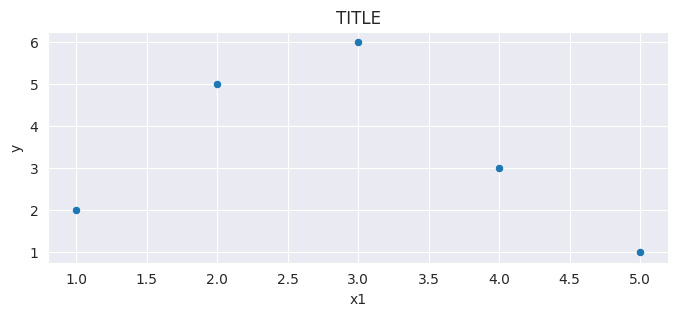

In [26]:
def draw_scatter_sns(df: pd.DataFrame, as_x: str, as_y: str, title=f'{df=}'.split('=')[0]) -> None:
    plt.figure(figsize=(8, 3))
    sns.set_style('darkgrid')
    sns.scatterplot(x=as_x, y=as_y, data=df)
    plt.title(title)
    plt.show()

draw_scatter_sns(df, as_x='x1', as_y='y', title='TITLE')

#### many dots in 2D

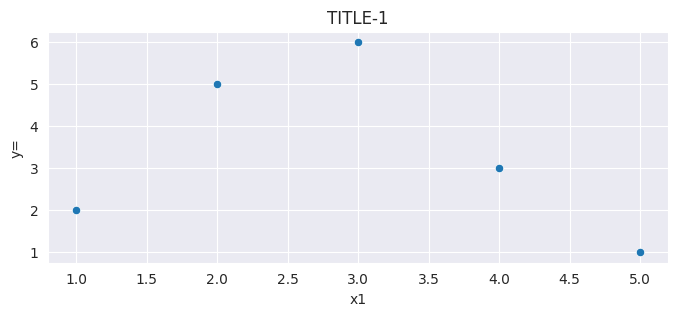

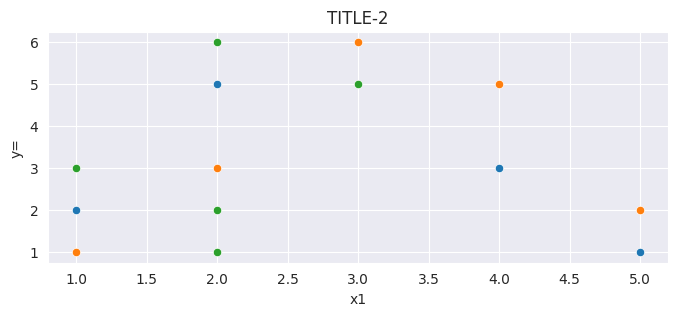

In [30]:
def draw_scatters_sns(df: pd.DataFrame, as_x: list, as_y: list, title=f'{df=}'.split('=')[0]) -> None:
    plt.figure(figsize=(8, 3))
    sns.set_style('darkgrid')
    [sns.scatterplot(x=x, y=y, data=df) for x, y in zip(as_x, as_y)]
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y=')
    plt.show()

draw_scatters_sns(df, as_x=['x1'], as_y=['y'], title='TITLE-1')
draw_scatters_sns(df, as_x=['x1', 'x2', 'x3'], as_y=['y', 'y', 'y'], title='TITLE-2')

#### line in 2D

#### many line in 2D

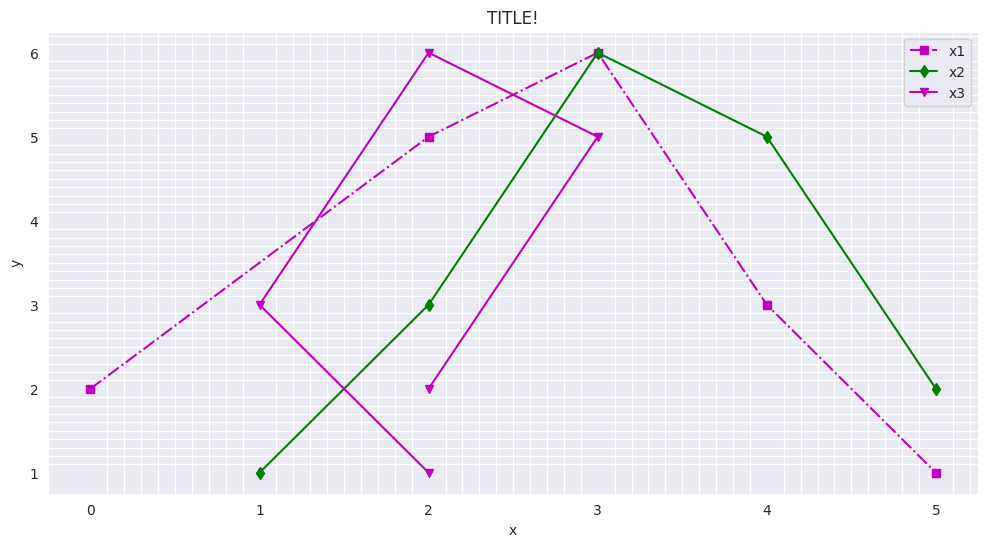

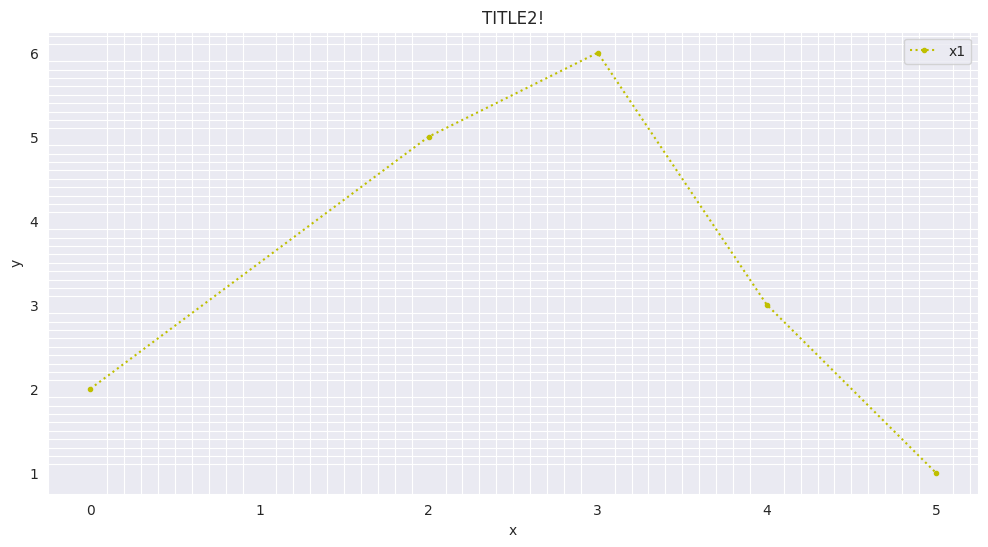

In [54]:
def draw_2D_many(data: pd.DataFrame, as_x: list, as_y: list, title: str, xlabel: str, ylabel: str, figsize: tuple|None=None) -> None:
    size = figsize or (15, 5)
    fig = plt.figure(figsize=size)
    ax = fig.add_subplot(1, 1, 1)
    major_ticks = np.arange(df[as_x].values.min(), df[as_x].values.max()+1, int((df[as_x].values.max() - df[as_x].values.min())/data.shape[0]))
    minor_ticks = np.arange(df[as_x].values.min(), df[as_x].values.max()+1, int((df[as_x].values.max() - df[as_x].values.min())/data.shape[0])/10)
    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    major_ticks_y = np.arange(df[as_y].values.min(), df[as_y].values.max()+1, int((df[as_y].values.max() - df[as_y].values.min())/data.shape[0]))
    minor_ticks_y = np.arange(df[as_y].values.min(), df[as_y].values.max()+1, int((df[as_y].values.max() - df[as_y].values.min())/data.shape[0])/10)
    ax.set_yticks(major_ticks_y)
    ax.set_yticks(minor_ticks_y, minor=True)

    for x, y in zip(as_x, as_y):
        plt.plot(
                 data[x], 
                 data[y], 
                 label=f'{x}', 
                 color=random.choice('rgbcmyk'), 
                 linestyle=random.choice(['-', '--', '-.', ':', None]),
                 marker=random.choice('o+xdvs*.^')
                 )

    # plt.plot(x, np.mean(data[:, 1:], axis = 1), label='mean', color='k', linestyle=None)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.legend()
    ax.grid(which='both')
    plt.show()

draw_2D_many(data=df, as_x=['x1', 'x2', 'x3'], as_y=['y', 'y', 'y'], title=f'TITLE!', xlabel='x', ylabel=f'y', figsize=(12, 6))
draw_2D_many(data=df, as_x=['x1'], as_y=['y'], title=f'TITLE2!', xlabel='x', ylabel=f'y', figsize=(12, 6))

#### pie

#### bar

#### histogram

#### swarmplot + others

#### distribution law

<Figure size 600x600 with 0 Axes>

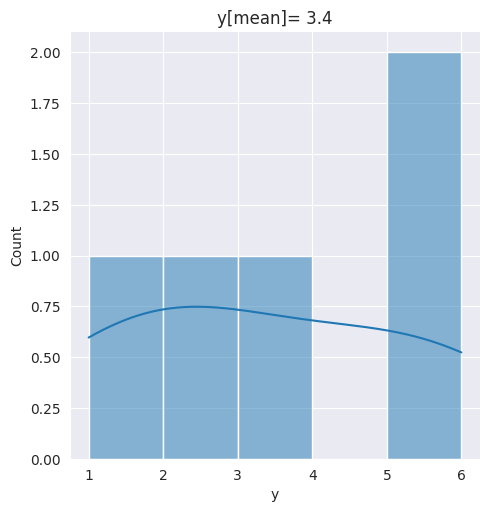

count    5.000000
mean     3.400000
std      2.073644
min      1.000000
25%      2.000000
50%      3.000000
75%      5.000000
max      6.000000
Name: y, dtype: float64


<Figure size 600x600 with 0 Axes>

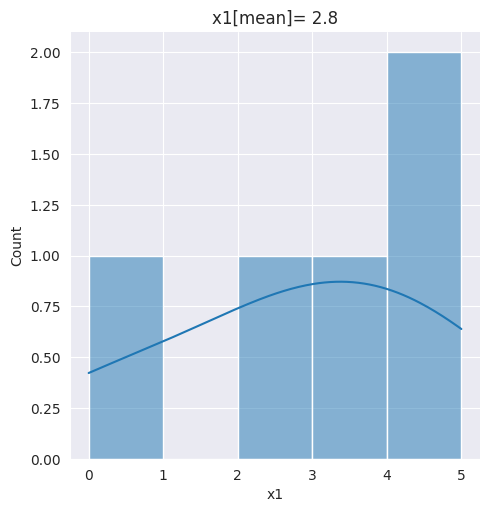

count    5.000000
mean     2.800000
std      1.923538
min      0.000000
25%      2.000000
50%      3.000000
75%      4.000000
max      5.000000
Name: x1, dtype: float64


<Figure size 600x600 with 0 Axes>

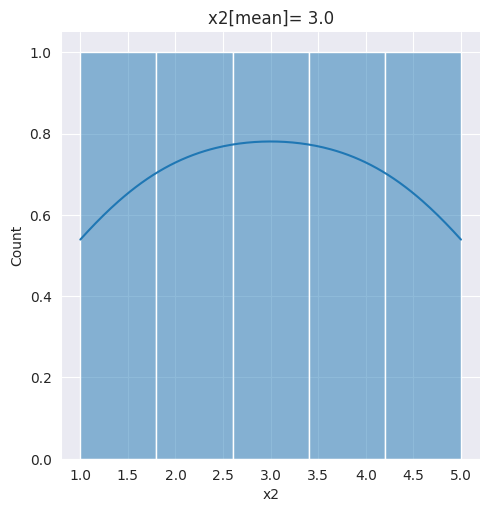

count    5.000000
mean     3.000000
std      1.581139
min      1.000000
25%      2.000000
50%      3.000000
75%      4.000000
max      5.000000
Name: x2, dtype: float64


<Figure size 600x600 with 0 Axes>

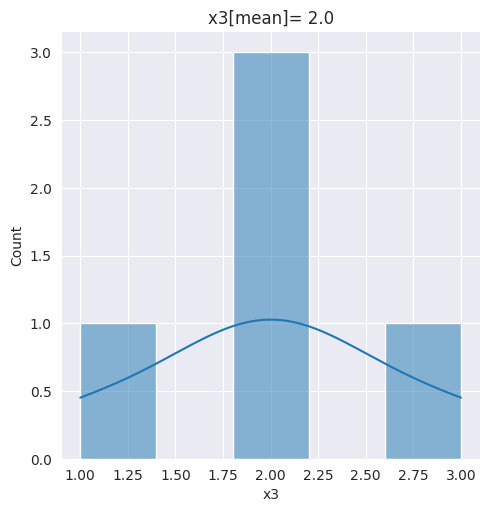

count    5.000000
mean     2.000000
std      0.707107
min      1.000000
25%      2.000000
50%      2.000000
75%      2.000000
max      3.000000
Name: x3, dtype: float64


In [56]:
def seaborn_displots(df: pd.DataFrame) -> None:
    for i in df:
        plt.figure(figsize=(6,6))
        sns.displot(df[i], kde=True, bins=int(df.shape[0]*0.045) if df.shape[0]>1000 else 5)
        plt.title(label=f'{i}[mean]= {df[i].mean()}')
        plt.show()
        print(df[i].describe())

seaborn_displots(df)

#### 3D dots

#### 3D lines